<a href="https://colab.research.google.com/github/giancarloliver/tutorials/blob/master/C%C3%B3pia_de_Traffic_Splitting_M_polka_Funcional_IdPerfil_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      unix_timestamp interface  bytes_out_s  bytes_in_s  bytes_total_s  \
0       1.686778e+09   s7-eth2          0.0         0.0            0.0   
1       1.686778e+09   s6-eth1          0.0         0.0            0.0   
2       1.686778e+09   s7-eth6          0.0         0.0            0.0   
3       1.686778e+09   s1-eth2          0.0         0.0            0.0   
4       1.686778e+09   s5-eth1          0.0         0.0            0.0   
...              ...       ...          ...         ...            ...   
6181    1.686779e+09   s7-eth5          0.0         0.0            0.0   
6182    1.686779e+09   s1-eth1          0.0         0.0            0.0   
6183    1.686779e+09   s4-eth2          0.0         0.0            0.0   
6184    1.686779e+09   s2-eth2          0.0         0.0            0.0   
6185    1.686779e+09     total          0.0         0.0            0.0   

      bytes_in  bytes_out  packets_out_s  packets_in_s  packets_total_s  \
0            0          0           

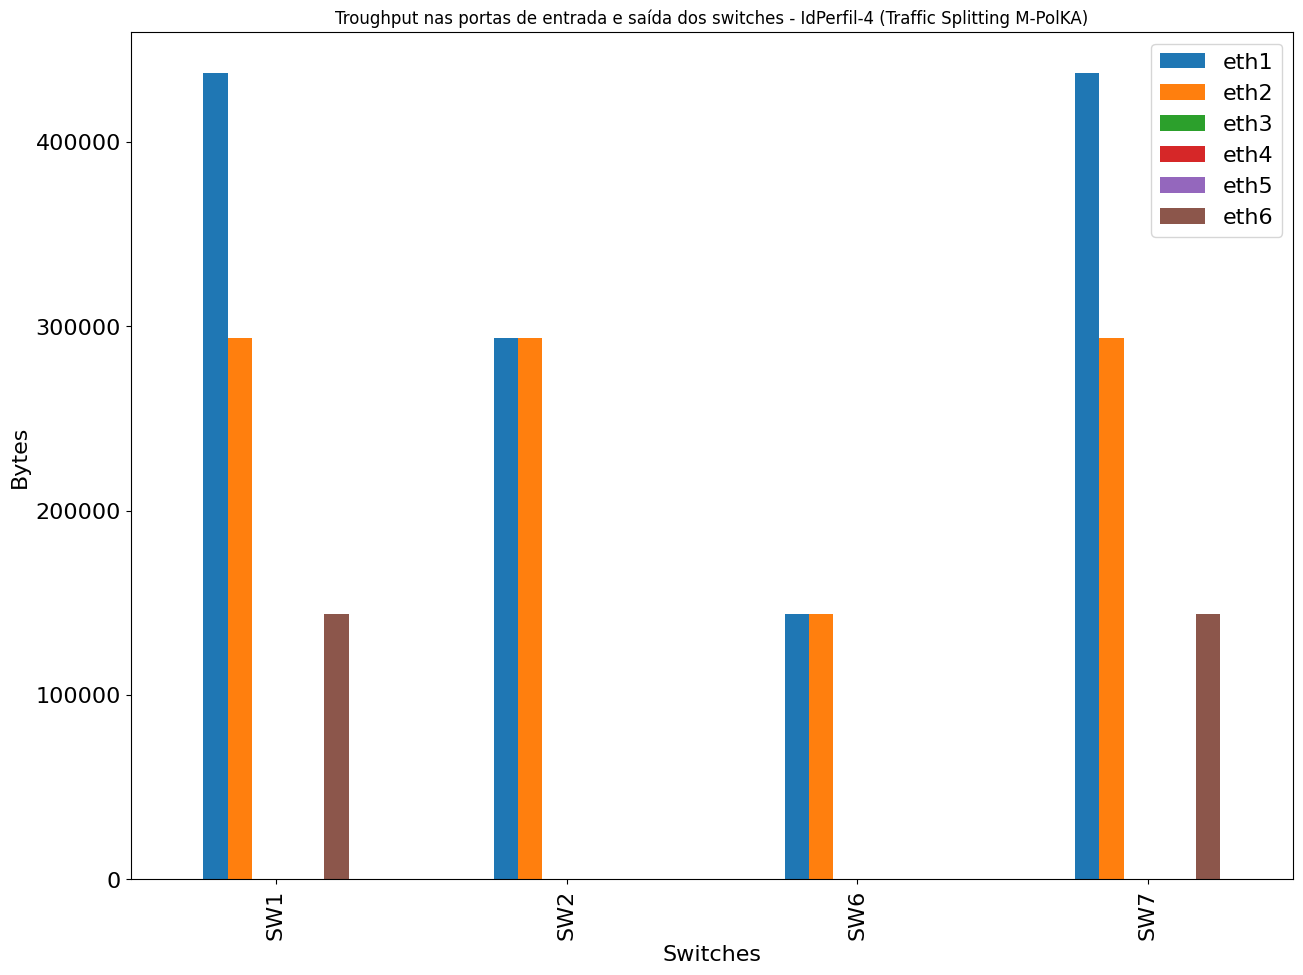

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

#Arquivo bwm
#arq = 'teste.bwm'
arq ='drive/MyDrive/Colab Notebooks/Teste_Traffic_M-Polka/IdPerfil-1/IdPerfil-1.bwm'


#csv output format:
#Type rate:
#unix timestamp;iface_name;bytes_out/s;bytes_in/s;bytes_total/s;bytes_in;bytes_out;packets_out/s;packets_in/s;packets_total/s;packets_in;packets_out;errors_out/s;errors_in/s;errors_in;errors_out\n
#Type svg, sum, max:
#unix timestamp;iface_name;bytes_out;bytes_in;bytes_total;packets_out;packets_in;packets_total;errors_out;errors_in\n
colunas = ['unix_timestamp','interface','bytes_out_s','bytes_in_s','bytes_total_s','bytes_in','bytes_out','packets_out_s','packets_in_s','packets_total_s','packets_in','packets_out','errors_out_s','errors_in_s','errors_in','errors_out']
data = pd.read_csv(arq, delimiter=',', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11 ,12 ,13 ,14 , 15])
data.columns = colunas

# Converte taxa para Mbps
def toMbps(df):
    dfY = (df * 8.0) / (1 << 20)  ## 1byte x 8bits / 1048576
    return dfY

# Cria uma colula com a taxa total em Mbps
#data['taxa_total_Mbps'] = toMbps(data['bytes_total_s'])

print(data)

# Filtra os dados agregados por todas as interfaces da máquina virtual
df_s1_1 = data.query('interface=="s1-eth1"')
df_s1_2 = data.query('interface=="s1-eth2"')
df_s1_3 = data.query('interface=="s1-eth3"')
df_s1_4 = data.query('interface=="s1-eth4"')
df_s1_5 = data.query('interface=="s1-eth5"')
df_s1_6 = data.query('interface=="s1-eth6"')

df_s2_1 = data.query('interface=="s2-eth1"')
df_s2_2 = data.query('interface=="s2-eth2"')

#df_s3_1 = data.query('interface=="s2-eth1"')
#df_s3_2 = data.query('interface=="s2-eth2"')

#df_s4_1 = data.query('interface=="s4-eth1"')
#df_s4_2 = data.query('interface=="s4-eth2"')

#df_s5_1 = data.query('interface=="s5-eth1"')
#df_s5_2 = data.query('interface=="s5-eth2"')

df_s6_1 = data.query('interface=="s6-eth1"')
df_s6_2 = data.query('interface=="s6-eth2"')

df_s7_1 = data.query('interface=="s7-eth1"')
df_s7_2 = data.query('interface=="s7-eth2"')
df_s7_3 = data.query('interface=="s7-eth3"')
df_s7_4 = data.query('interface=="s7-eth4"')
df_s7_5 = data.query('interface=="s7-eth5"')
df_s7_6 = data.query('interface=="s7-eth6"')

df = pd.DataFrame([
                  ['SW1', sum(df_s1_1['bytes_in']), sum(df_s1_2['bytes_out']), sum(df_s1_3['bytes_out']), sum(df_s1_4['bytes_out']), sum(df_s1_5['bytes_out']), sum(df_s1_6['bytes_out'])],
                  ['SW2', sum(df_s2_1['bytes_in']), sum(df_s2_2['bytes_out']), 0],
                  #['SW4', sum(df_s4_1['bytes_in']), sum(df_s4_2['bytes_out']), 0],
                  ['SW6', sum(df_s6_1['bytes_in']), sum(df_s6_2['bytes_out']), 0],
                  ['SW7', sum(df_s7_1['bytes_out']), sum(df_s7_2['bytes_in']), sum(df_s7_3['bytes_in']), sum(df_s7_4['bytes_in']), sum(df_s7_5['bytes_in']), sum(df_s7_6['bytes_in']),]
                  ],
                  columns=['Switches', 'eth1', 'eth2','eth3' ,'eth4','eth5','eth6'])
print(df)

ax = df.plot(x='Switches', ylabel='Bytes', fontsize = 16, figsize = (15,11), kind='bar',title='Troughput nas portas de entrada e saída dos switches - IdPerfil-4 (Traffic Splitting M-PolKA)')
ax.set_xlabel('Switches', fontsize = 16)
ax.set_ylabel('Bytes', fontsize = 16)
ax.legend(fontsize = 16)
